In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
#from sklearn.decomposition import PCA
from sklearn import datasets
#from plotly.offline import iplot
#import plotly

#Plotly account and offline notebook

In [2]:
iris = datasets.load_iris()
'''
    def Sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))

    x = np.arange(-10, 10, 0.1)
    h = Sigmoid(x)  # Sigmoid
    plot = plt.plot(x, h)
    plt.axvline(0.0, color='k')
    plt.axhline(y=0.5, ls='dotted', color='k')
    plt.yticks([0.0,  0.5, 1.0])  # y axis label
    plt.title(r'Sigmoid Plot', fontsize = 15)
    plt.text(5,0.8,r'$y = \frac{1}{1+e^{-z}}$', fontsize = 18)
    plt.show()
'''


print("Iris Dataset contains %s samples in total，%s features."%(iris.data.shape[0], iris.data.shape[1]))
print("Labels' shape %s." %(iris.target.shape))

Iris Dataset contains 150 samples in total，4 features.
Labels' shape 150.


In [3]:
from sklearn.model_selection import train_test_split

X = iris.data[:, :2]             # Get the first 2 columns.
Y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(C = 1e5) # C: Inverse of regularization strength
lr = LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
lr.fit(x_train,y_train)
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='multinomial',
#          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False)

print("Logistic Regression accuracy：%.3f" %lr.score(x_train, y_train))
print("Logistic Regression accuracy：%.3f" %lr.score(x_test, y_test))

Logistic Regression accuracy：0.829
Logistic Regression accuracy：0.822


In [5]:
from sklearn import metrics
y_hat = lr.predict(x_test)
target_names = ['setosa', 'versicolor', 'virginica']
print(metrics.classification_report(y_test, y_hat, target_names = target_names))
#precision is caring about how useful the solution is , the recall is caring about how complete the results are
#support is the times that each label appear

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # the range of column 0
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # the range of column 1
h = .02
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.81      0.72      0.76        18
   virginica       0.62      0.73      0.67        11

   micro avg       0.82      0.82      0.82        45
   macro avg       0.81      0.82      0.81        45
weighted avg       0.83      0.82      0.82        45



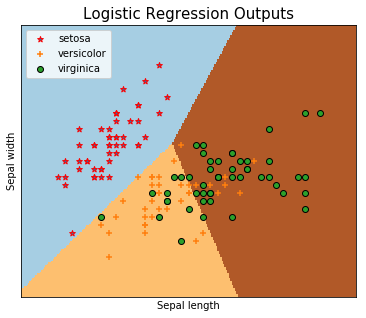

In [6]:
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # test nodes
grid_hat = lr.predict(grid_test)                  # test classification
# grid_hat = lr.predict(np.c_[x1.ravel(), x2.ravel()])
grid_hat = grid_hat.reshape(x1.shape)

plt.figure(1, figsize=(6, 5))
#Predict outputs, three colour blocks
plt.pcolormesh(x1, x2, grid_hat,cmap=plt.cm.Paired)

# plt.scatter(X[:, 0], X[:, 1], c=Y,edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X[:50, 0], X[:50, 1], marker = '*', edgecolors='red', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], marker = '+', edgecolors='k', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], marker = 'o', edgecolors='k', label='virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc = 2)

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
plt.title("Logistic Regression Outputs", fontsize = 15)
plt.xticks(())
plt.yticks(())
plt.grid()
# The setosa class is linearly seperable, while the bersicolor is not linear seperable from virginica.
plt.show()